In [2]:
from ipynb.fs.full.functions import import_data
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers, regularizers
import numpy as np
import keras.utils
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.


### Import data

In [5]:
#import training set
X_train, y_train = import_data('databases/Database_2_training.csv')
X_test, y_test = import_data('databases/Database_2_test.csv')
input_size = X_train.shape[1]


### Build model 



In [3]:
model = Sequential()

model.add(Dense(512, activation='relu', input_dim=input_size,kernel_regularizer=regularizers.l2(0.00)))
model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile model

In [4]:
optimizer = optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train model

In [5]:
#X_train is 0.8 of total data set so cross validation needs to be 0.25 of X_train to be 0.2 of total dataset
history = model.fit(X_train, y_train, validation_split=0.25, epochs=150, batch_size=16, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 2267 samples, validate on 756 samples
Epoch 1/150
2267/2267 [==============================] - 2s 1ms/step - loss: 0.9395 - acc: 0.5712 - val_loss: 0.6942 - val_acc: 0.6574
Epoch 2/150
2267/2267 [==============================] - 0s 181us/step - loss: 0.8747 - acc: 0.5827 - val_loss: 0.7329 - val_acc: 0.6548
Epoch 3/150
2267/2267 [==============================] - 0s 172us/step - loss: 0.8544 - acc: 0.5739 - val_loss: 0.6552 - val_acc: 0.6693
Epoch 4/150
2267/2267 [==============================] - 0s 170us/step - loss: 0.8439 - acc: 0.5968 - val_loss: 0.6743 - val_acc: 0.6376
Epoch 5/150
2267/2267 [==============================] - 0s 171us/step - loss: 0.8143 - acc: 0.5836 - val_loss: 0.6517 - val_acc: 0.6680
Epoch 6/150
2267/2267 [==============================] - 0s 185us/step - loss: 0.7871 - acc: 0.5871 - val_loss: 0.7059 - val_acc: 0.6653
Epoch 7/150
2267/2267 [==============================] - 0s 168us/step - loss: 0.8086

2267/2267 [==============================] - 0s 171us/step - loss: 0.6631 - acc: 0.6273 - val_loss: 0.6563 - val_acc: 0.6693
Epoch 59/150
2267/2267 [==============================] - 0s 170us/step - loss: 0.6575 - acc: 0.6277 - val_loss: 0.6613 - val_acc: 0.6640
Epoch 60/150
2267/2267 [==============================] - 0s 179us/step - loss: 0.6604 - acc: 0.6268 - val_loss: 0.6578 - val_acc: 0.6693
Epoch 61/150
2267/2267 [==============================] - 0s 170us/step - loss: 0.6586 - acc: 0.6286 - val_loss: 0.6358 - val_acc: 0.6693
Epoch 62/150
2267/2267 [==============================] - 0s 172us/step - loss: 0.6588 - acc: 0.6281 - val_loss: 0.6445 - val_acc: 0.6693
Epoch 63/150
2267/2267 [==============================] - 0s 177us/step - loss: 0.6570 - acc: 0.6277 - val_loss: 0.6678 - val_acc: 0.6693
Epoch 64/150
2267/2267 [==============================] - 0s 181us/step - loss: 0.6574 - acc: 0.6273 - val_loss: 0.6483 - val_acc: 0.6693
Epoch 65/150
2267/2267 [=======================

### Plot results

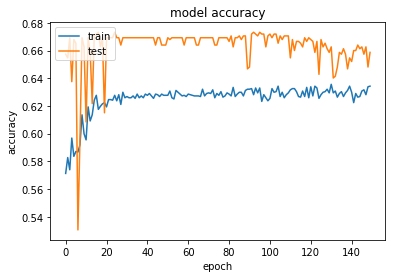

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on test set

In [7]:
loss, accuracy = model.evaluate(x=X_test, y=y_test,batch_size=64, verbose=1)
print('loss on test set = ' + str(loss))
print('accuracy on test set = ' + str(accuracy))

732/732 [==============================] - 0s 23us/step
loss on test set = nan
accuracy on test set = 0.5792349726775956


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [9]:
results = model.predict(X_test, batch_size=64, verbose=0, steps=None)

In [10]:


results = pd.DataFrame(results, columns=['results']).to_csv('databases/Database_2_results.csv')